<a href="https://colab.research.google.com/github/vu3bpn/machine_learn_1/blob/master/test_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [0]:
f1 = lambda x: np.sin(x)
f2 = lambda x: np.sin(x)*np.cos(x)
f3 = lambda x: np.sin(x)**2
func_list = [f1,f2,f3]

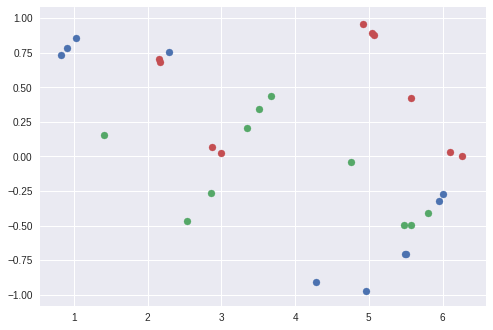

In [0]:
n_f = 20000
n_s = 10
vector_list =[]
out_list = []
for batch_no  in range(n_f):
  idx= 0 
  for func_1 in func_list:
    x = np.random.random(n_s)*np.pi*2
    y = list(map(func_1,x))
    vector_list.append([np.array([x,y]).flatten()])
    out_list.append([idx])
    idx+=1
    if batch_no == 0:
      plt.scatter(x,y)
vector_array = np.array(vector_list)

In [0]:
print(tf.one_hot(out_list,depth=3))
#print(vector_array)
print(vector_array.shape)

Tensor("one_hot:0", shape=(60000, 1, 3), dtype=float32)
(60000, 1, 20)


#creating and compiling the model

In [0]:
model1 = tf.keras.models.Sequential()
model1.add(tf.layers.Dense(10,input_shape=(1,2*n_s)))
model1.add(tf.layers.Dense(5,activation='relu'))
model1.add(tf.layers.Dense(3,activation='softmax'))

In [0]:
model1.compile(optimizer = 'adam', loss = 'categorical_crossentropy')
print(model1.summary())
print(model1.output_shape)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1, 10)             210       
_________________________________________________________________
dense_2 (Dense)              (None, 1, 5)              55        
_________________________________________________________________
dense_3 (Dense)              (None, 1, 3)              18        
Total params: 283
Trainable params: 283
Non-trainable params: 0
_________________________________________________________________
None
(None, 1, 3)


#train the model

In [21]:
#help(model1.fit)
model1.fit(vector_array,tf.one_hot(out_list,depth=3),steps_per_epoch=100,epochs=200,shuffle = True)

Epoch 1/200
100/100 [==============================] - 8s 75ms/step - loss: 0.2225
Epoch 2/200
100/100 [==============================] - 8s 79ms/step - loss: 0.2225
Epoch 3/200
100/100 [==============================] - 8s 77ms/step - loss: 0.2225
Epoch 4/200
100/100 [==============================] - 8s 77ms/step - loss: 0.2225
Epoch 5/200
100/100 [==============================] - 8s 77ms/step - loss: 0.2225
Epoch 6/200
100/100 [==============================] - 8s 77ms/step - loss: 0.2225
Epoch 7/200
100/100 [==============================] - 8s 77ms/step - loss: 0.2225
Epoch 8/200
100/100 [==============================] - 8s 77ms/step - loss: 0.2225
Epoch 9/200
100/100 [==============================] - 8s 77ms/step - loss: 0.2225
Epoch 10/200
100/100 [==============================] - 8s 77ms/step - loss: 0.2225
Epoch 11/200
100/100 [==============================] - 8s 77ms/step - loss: 0.2225
Epoch 12/200
100/100 [==============================] - 8s 77ms/step - loss: 0.2225
E

In [0]:
vector_list_verify =[]
val_list = [0,1,2,2,1,0]
for func_idx in val_list:
  func_1 = func_list[func_idx]
  x = np.random.random(n_s)*np.pi*2
  y = list(map(func_1,x))
  feat_vect = np.array([np.array([x,y]).flatten()])
  out = model1.predict(np.array([feat_vect]))
  print(func_idx,out,np.argmax(out.squeeze()))

In [22]:
val_nf = 200
val_vect_list =[]
val_out_list =[]
for batch_no  in range(val_nf):
  idx = 0
  for func_1 in func_list:
    x = np.random.random(n_s)*np.pi*2
    y = list(map(func_1,x))
    val_vect_list.append([np.array([x,y]).flatten()])
    val_out_list.append([idx])
    idx+=1
val_vect_array = np.array(val_vect_list)
#res = model1.evaluate(val_vect_array,tf.one_hot(val_out_list,depth=3),steps=10)
val_out = model1.predict(val_vect_array)
val_out_index = list(map(lambda x:np.argmax(x), val_out))
#con_mat = tf.confusion_matrix( ,val_out_list)

print(len(val_out_index))
print(len(np.array(val_out_list).flatten()))
con_mat = tf.confusion_matrix(labels = np.array(val_out_list).flatten(),predictions= val_out_index)
sess = tf.Session()
print(con_mat.eval(session=sess))
#help(model1.evaluate)

600
600
[[178  16   6]
 [  8 189   3]
 [  7   4 189]]
